# Introduction 

The purpose of this task is to introduce us the Logistic Regression. Our aim is to understand how to use Logistic Regression for clasiffication when we have a binary response variable or a  multiclass response variable

We are going to use one dataset from Machine Learning Repository 
(https://archive.ics.uci.edu/ml/index.php). You can find the dataset in the link below. https://archive.ics.uci.edu/ml/datasets/wine. 

Specifically there are two datasets one for the red wines and one the white wines, but we are going to use only the dataset from the red wines as the purpose of this essay is to understand better the logistic regression and how we can apply it for clasiffication. The proper analysis that someone can do is to do a statistical analysis for the two datasets (red wines and white wines) separately and then compare the results and extract some deduction about the quality of wines.

These datasets can be viewed as classification or regression tasks. The classes 
are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Citation Request:

Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.Modeling wine preferences by data mining from physicochemical properties.  In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

(https://archive.ics.uci.edu/ml/datasets/wine+Quality)

(https://www.vinhoverde.pt/en/)

# Summary

 The purpose of this essay is to build a model that can predict whether the quality of red wine is good or bad. As we are going to see later on the response variable which we want to predict is quality.
  
  We will deal with this query with two different approaches:

1.   We face the response variable as a multiclass.
2.   We face the response variable as a binary.

In first case we are going to use a multiclass logistic regression and in the second one the logistic regression.



# Chapter 1 Insert and explore the dataset



## 1.1 Import libraries
 First thing first, we have to upload some necessary libraries to insert our data and after that to visualise the main information about it.

In [ ]:
# Load packages and check versions
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn
from google.colab import drive
drive.mount('/content/gdrive')

In [3]:
df=pd.read_excel("/content/gdrive/MyDrive/wine/winequality-red_telos.xlsx")

 ## 1.2  Descriptive statistics 
 As we can see all the variables are numbers.

In [ ]:

df.shape
df.info()

In sequence we have to check if we have any Na values.

In [ ]:
#We dont have na values 
df.isnull().sum()

  
  Since it is not necessary to do data cleaning we are going to visualise the distribution of each variable. We need to upload the widgets library to make the plots interactive.
  
  The aim of the descriptive statistic is to identify whether a variable has a outliers or not and how it's values are distributed.
 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from IPython.display import IFrame
documentation = IFrame(src='https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html', 
                       width=1000, 
                       height=400)
display(documentation)

import ipywidgets

In [ ]:
@ipywidgets.interact
def plot(col=df.columns):                                              # numerical variable univariate plot
    f, ax = plt.subplots(figsize=(7, 3))
    ax = sns.distplot(df[col])                                         # visualize the distribution
    plt.show();
    ax = sns.boxplot(x=df[col])                                        # detect outliers
    plt.show();

 ## 1.3 Correlation, F-statistic
 Before we proceed to build a model we have to chech if we have multicolinearity among the variables. Multicolinearity is when two variables are highly correlated. 

 We will apply a heatmap to see which variables are correllated

In [ ]:
corr=df.corr()
corr.iloc[0:5,0:5]
#five rows an d five columns

In [ ]:

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values,
center=0)

From the correlation matric above we didn't see any highly correlations among the variables. Now we have to choose which of them is necessary to keep for further analysis. To extract the more important variables we will make advantage of F-test statistics.


In [21]:
# we write all the variables in to a list
features_responses=df.columns.tolist()

In [20]:
X=df.iloc[:,:-1] # In this way, we see  is all the variables
y=df.iloc[:,-1] # In this way, we see  the response variable
print(X.shape, y.shape)

(1599, 11) (1599,)


In [ ]:
from sklearn.feature_selection import f_classif

[f_stat, f_p_value]=f_classif(X,y)

# we define our dataframe

f_test_df = pd.DataFrame({'Feature':features_responses[:-1],'F statistic':f_stat,'p value':f_p_value})

f_test_df.sort_values('p value')

# from the below matrix we can obtain the most important variables 
# important variables are those we are going to use in building models


In [23]:
# We take the first 8 more important variables
df.columns
variable=df[["total_sulfur_dioxide","sulphates","citric_acid","volatile_acidity","fixed_acidity","chlorides","free sulfur_dioxide","pH"]]

In [ ]:

df.describe
df["quality"]
df["quality"].nunique()

# response variable has 6 categories
df["quality"].value_counts()

## 1.4 Logistic regression basic tools

The LogisticRegression class can be configured for multinomial logistic regression by setting the “multi_class” argument to “multinomial” and the “solver” argument to a solver that supports multinomial logistic regression, such as “lbfgs“

In [26]:

from sklearn.linear_model import LogisticRegression

In [27]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

The multinomial logistic regression model will be fit using cross-entropy loss and will predict the integer value for each integer encoded class label.

In [28]:

# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [ ]:
df.columns

##1.5 Methodology
we are going to apply the follow methodology.

1.   Before we proceed to further analysis we have to scale our data.
2.   We will train our model.
3.   we will evaluate it.
4.   We visuazile the ROC CURVE 

1) Scale τα δεδομένα μας
2) εκπαίδευση του μοντέλου μας
3) Roc Auc 
4) threshold
5) oprimization με εύρεση την υπερπαραμετρο C

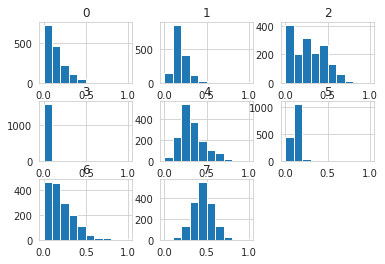

In [72]:
#we are need the min max sceler to scale our data
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()


#scale_data=df.values[:,:-1]
scale_data=df[["total_sulfur_dioxide","sulphates","citric_acid","volatile_acidity","fixed_acidity","chlorides","free sulfur_dioxide","pH"]].values


#έχουμε κανει τα δεδομένα μας scale
scale_data_1=min_max_sc.fit_transform(scale_data)

scale_data_1=pd.DataFrame(scale_data_1)
scale_data_1.hist()


In [37]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot


In [ ]:
scale_data_1

 We split the data into train and test set
 
 2) βήμα χωρίζουμε το σύνολο σε train και σε test set

###  1.5.1 OvR methodoly 
One versus the rest



# Data preprocessing

In [73]:
from sklearn.model_selection import train_test_split
X=scale_data_1
y=df["quality"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=24)

### 1.5.2  Laber encoding στην  y 

In [74]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

### 1.5.3 Split data in train and test set

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### 1.5.4 Normalize the data

In [76]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

###  1.5.5. Classification

In [77]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

Training Phase
This will be done by parsing the training set to a classifier or classifiers Because we are dealing with 3 classes, this becomes a multiclass classification problem. We therefore us the One-vs-the-rest strategy.\ This strategy involves fitting one classifier per class. For each classifier, the class is fitted against all the other classes. Here, we use the Random Forest Classifier

# Plot Auc ROC curve

### 1.5.6 Logistic regression OvR


In [80]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression

In [81]:
#Logistic Regression multiclass clasifier
#because we are dealing with multiclass data and so, the one versus rest strategy is used.
#learn to predict each class against the other.

RF=OneVsRestClassifier(LogisticRegression(multi_class="ovr"))
RF.fit(X_train_norm,y_train)
y_pred =RF.predict(X_test_norm)
pred_prob = RF.predict_proba(X_test_norm)

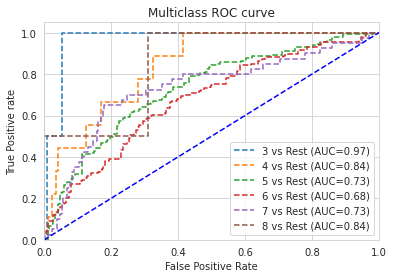

In [82]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

# Chaprer 2 

 Now we gonna do the same methodology for the binary problem 

## 2.1 Binary
We create a dummy variable from the quality so if the quality of wine is 6 and above the quality is considerated as good otherwise is considerated as bad
 

In [49]:
#df["quality"].unique_values()
np.unique(df["quality"])

array([3, 4, 5, 6, 7, 8])

In [50]:
dummy = np.where((df['quality'] == 4) | (df['quality'] == 5) | (df['quality'] == 3) ,0,1)


In [51]:
#print(dummy, type)
np.unique(dummy)
#print(dummy)
dummy=pd.DataFrame(dummy)

In [52]:
df_1=pd.concat([df,dummy],axis=1)
df_1=pd.DataFrame(df_1)


In [53]:
data_new1 = df_1.copy()                                     # Create copy of DataFrame
data_new1.columns = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar',
                     'chlorides','free sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality',"dummy"]  

data_new1.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'dummy'],
      dtype='object')

In [ ]:
data_new1.info()
#print(data_new1, type)

## 2.2  DATA PREPROCESSING

In [90]:
scale_data=data_new1[["total_sulfur_dioxide","sulphates","citric_acid","volatile_acidity","fixed_acidity","chlorides","free sulfur_dioxide","pH"]].values

In [91]:
from sklearn.model_selection import train_test_split
#X=scale_data_1[["total_sulfur_dioxide","sulphates","citric_acid","volatile_acidity","fixed_acidity","chlorides","free sulfur_dioxide","pH"]]
X=scale_data[:, :-1]
y=data_new1["dummy"]

## 2.3 Label preprocessing

In [92]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

## 2.4 Split the data

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## 2.5 Normalize the data

In [94]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

## 2.6  Classification Logistic binary regression

In [95]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression

In [96]:
#Random Forest Classifier
#because we are dealing with multiclass data and so, the one versus rest strategy is used.
#learn to predict each class against the other.

RF=LogisticRegression()
RF.fit(X_train_norm,y_train)
y_pred =RF.predict(X_test_norm)
y_pred_prob = RF.predict_proba(X_test_norm)

## 2.7 Confussion Matrix

In [97]:
from sklearn import metrics
#ta predicting propabilities

y_pred_prob
y_pred_prob[:,1]
metrics.confusion_matrix(y_test,y_pred)

array([[138,  16],
       [ 87,  79]])

## 2.8  ROC AUC CURVE

In [ ]:
pos_proba = y_pred_prob[:,1]
pos_proba

In [ ]:
#ypologizoyme to ROC AUC 
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [100]:
thresholds
# το accuracy
metrics.roc_auc_score(y_test, pos_proba)

0.7530902832107652

## 2.9  Best threshold

In [101]:
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))


In [102]:
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.341446, G-Mean=0.682


In [ ]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# Chapter 3 Hyperparameter


## 3.1 find the best value for C by hand

In [104]:
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [105]:
param_grid=[
    {"penalty":["l1","l2","elasticnet","none"],
    "C":np.logspace(-4,4,20) } ]

In [106]:
from sklearn.model_selection import GridSearchCV
log_model=LogisticRegression()
clf=GridSearchCV(log_model, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

In [107]:
X_train
y_train

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
best_clf=clf.fit(X_train,y_train)


In [109]:
print(best_clf.best_estimator_)

LogisticRegression(C=29.763514416313132)


In [110]:
best_clf.score(X_test,y_test)

0.6625

In [ ]:
log_model.fit(X_train,y_train)

In [112]:
pred_prob_t=log_model.predict_proba(X_test)

In [ ]:
from sklearn.metrics import log_loss
C_list=np.geomspace(1e-1,1e+1,num=20)
CA=[]
Logarithimic_Loss = []

for c in C_list:
  log_reg=LogisticRegression(random_state=10,solver="lbfgs",C=c)
  log_reg.fit(X_train,y_train)
  score=log_reg.score(X_test,y_test)
  CA.append(score)
  print("the ca of C is {} and {}".format(c,score))
  log_loss2=log_loss(y_test,pred_prob_t)
  Logarithimic_Loss.append(log_loss2)
  print(" the logarithimic_Loss of C {} is {}".format(c, log_loss2))
  #print("")

In [114]:
CA
data=np.array(CA).reshape(20,)
data_1=np.array(Logarithimic_Loss).reshape(20,)

In [115]:
df=zip(C_list,data,data_1)
df

In [ ]:
df_final=pd.DataFrame(df,columns=["C_list","CA","Logarithimic_Loss"])
df_final.head(20)

In [ ]:
df_final.sort_values("Logarithimic_Loss",ascending=True)
# h kalyterh timh gia to C einai to 0.1

## 3.2 Find the best value for C using the CV
Μολισ βρουμε το C τοτε ξανα υπολογιζουμε μια λογιστικη παλινδρόμηση βάζοντας το C = 0.1 με το χέρι.

In [118]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

kf=KFold(n_splits=3, random_state=0, shuffle=True)


In [ ]:
Log_reg3=LogisticRegressionCV(cv=kf ,random_state=15,Cs=C_list)
#Log_reg3=LogisticRegressionCV(random_state=15,Cs=C_list)
Log_reg3.fit(X_train,y_train)

In [ ]:
Log_reg3.score(X_test,y_test)
pred_proba=Log_reg3.predict_proba(X_test)
Log_loss3=log_loss(y_test,pred_proba)
Log_loss3
Log_reg3.C_

In [121]:

model = LogisticRegression()

# define the model evaluation procedure

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model and collect the scores

n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report the model performance

print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.693 (0.035)


In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression( penalty='none')
		else:
			models[key] = LogisticRegression( C=p, penalty='l2')
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
#X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Αυτο που μένει είναι να βάλουμε το hyperparameter που βρήκαμε στο μοντελο και να ξανα εκπαιδεύσουμε την λογιστίκη παλινδρόμηση με άλλο hyperparameter και αλλο threshold.

## Multinomial regression

Tune Penalty for Multinomial Logistic Regression
An important hyperparameter to tune for multinomial logistic regression is the penalty term.

This term imposes pressure on the model to seek smaller model weights. This is achieved by adding a weighted sum of the model coefficients to the loss function, encouraging the model to reduce the size of the weights along with the error while fitting the model.

A popular type of penalty is the L2 penalty that adds the (weighted) sum of the squared coefficients to the loss function. A weighting of the coefficients can be used that reduces the strength of the penalty from full penalty to a very slight penalty.

By default, the LogisticRegression class uses the L2 penalty with a weighting of coefficients set to 1.0. The type of penalty can be set via the “penalty” argument with values of “l1“, “l2“, “elasticnet” (e.g. both), although not all solvers support all penalty types. The weighting of the coefficients in the penalty can be set via the “C” argument.



In [ ]:

# define the multinomial logistic regression model with a default penalty
LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)

LogisticRegression(multi_class='multinomial')

C : float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

This means that values close to 1.0 indicate very little penalty and values close to zero indicate a strong penalty. A C value of 1.0 may indicate no penalty at all.

C close to 1.0: Light penalty.
C close to 0.0: Strong penalty.